In [2]:
import sys
sys.path = ['', '/Users/HangYao/anaconda/lib/python27.zip', '/Users/HangYao/anaconda/lib/python2.7', 
            '/Users/HangYao/anaconda/lib/python2.7/plat-darwin', '/Users/HangYao/anaconda/lib/python2.7/plat-mac', 
            '/Users/HangYao/anaconda/lib/python2.7/plat-mac/lib-scriptpackages', 
            '/Users/HangYao/anaconda/lib/python2.7/lib-tk', '/Users/HangYao/anaconda/lib/python2.7/lib-old', 
            '/Users/HangYao/anaconda/lib/python2.7/lib-dynload', 
            '/Users/HangYao/anaconda/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg', 
            '/Users/HangYao/anaconda/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg', 
            '/Users/HangYao/anaconda/lib/python2.7/site-packages', 
            '/Users/HangYao/anaconda/lib/python2.7/site-packages/aeosa']
print sys.path

['', '/Users/HangYao/anaconda/lib/python27.zip', '/Users/HangYao/anaconda/lib/python2.7', '/Users/HangYao/anaconda/lib/python2.7/plat-darwin', '/Users/HangYao/anaconda/lib/python2.7/plat-mac', '/Users/HangYao/anaconda/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/HangYao/anaconda/lib/python2.7/lib-tk', '/Users/HangYao/anaconda/lib/python2.7/lib-old', '/Users/HangYao/anaconda/lib/python2.7/lib-dynload', '/Users/HangYao/anaconda/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg', '/Users/HangYao/anaconda/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg', '/Users/HangYao/anaconda/lib/python2.7/site-packages', '/Users/HangYao/anaconda/lib/python2.7/site-packages/aeosa']


In [213]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import renders as rs
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

seed = 42

In [164]:
data = pd.read_csv("Example_Data-Table 1.csv")
data.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis=1, inplace=True)
data['day'] = pd.to_datetime(data['day'], dayfirst=True)
data['site'] = data['site'].astype('category')
data['new_customer'].replace([0,1], ['returning','new'], inplace=True)
data['new_customer'].fillna('neither', inplace=True)
data['new_customer'] = data['new_customer'].astype('category')
data['platform'].fillna('Unknown', inplace=True)
data['platform'] = data['platform'].astype('category')
data['gross_sales'].fillna(0, inplace=True)
print data.dtypes
print data.head()

day                   datetime64[ns]
site                        category
new_customer                category
platform                    category
visits                         int64
distinct_sessions              int64
orders                         int64
gross_sales                  float64
bounces                        int64
add_to_cart                    int64
product_page_views             int64
search_page_views              int64
dtype: object
         day    site new_customer    platform  visits  distinct_sessions  \
0 2013-01-01    Acme          new     Android      24                 16   
1 2013-01-01    Acme          new  BlackBerry       0                  0   
2 2013-01-01  Sortly          new        iPad       0                  0   
3 2013-01-01    Acme          new     Windows     922                520   
4 2013-01-01   Botly          new     Android      11                 10   

   orders  gross_sales  bounces  add_to_cart  product_page_views  \
0      14       1

In [165]:
data['conversion_rate'] = pd.Series(data['orders'] / data['visits'], index=data.index)
data['bounce_rate'] = pd.Series(data['bounces'] / data['visits'], index=data.index)
data['add_to_cart_rate'] = pd.Series(data['add_to_cart'] / data['visits'], index=data.index)
data['conversion_rate'].fillna(0, inplace=True)
data['bounce_rate'].fillna(0, inplace=True)
data['add_to_cart_rate'].fillna(0, inplace=True)
print data.shape
print data.head()

(21061, 15)
         day    site new_customer    platform  visits  distinct_sessions  \
0 2013-01-01    Acme          new     Android      24                 16   
1 2013-01-01    Acme          new  BlackBerry       0                  0   
2 2013-01-01  Sortly          new        iPad       0                  0   
3 2013-01-01    Acme          new     Windows     922                520   
4 2013-01-01   Botly          new     Android      11                 10   

   orders  gross_sales  bounces  add_to_cart  product_page_views  \
0      14       1287.0        4           16                 104   
1       0         13.0        0            0                   1   
2       0         98.0        0            0                   0   
3     527      60753.0      149          610                3914   
4      11       1090.0        0           11                   4   

   search_page_views  conversion_rate  bounce_rate  add_to_cart_rate  
0                192         0.583333     0.166667 

In [202]:
display(data.describe())
#data.to_csv('processed.csv')

,visits,distinct_sessions,orders,gross_sales,bounces,add_to_cart,product_page_views,search_page_views,conversion_rate,bounce_rate,add_to_cart_rate
count,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000
mean,1934.708039,1515.205024,62.378994,8983.284317,743.282085,166.250890,4358.198234,8584.187788,0.194310,0.299798,0.259098
std,7448.607191,5925.833287,260.279286,38623.987818,3154.697787,505.186834,14327.287354,31120.321365,0.318016,0.275098,0.329302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000
50%,24.000000,19.000000,0.000000,16.000000,5.000000,4.000000,53.000000,82.000000,0.000000,0.250000,0.091346
75%,360.000000,274.000000,7.000000,1055.000000,97.000000,43.000000,708.000000,1229.000000,0.250000,0.500000,0.444444
max,136057.000000,107104.000000,4916.000000,707642.000000,54512.000000,7924.000000,187601.000000,506629.000000,1.000000,1.000000,1.000000


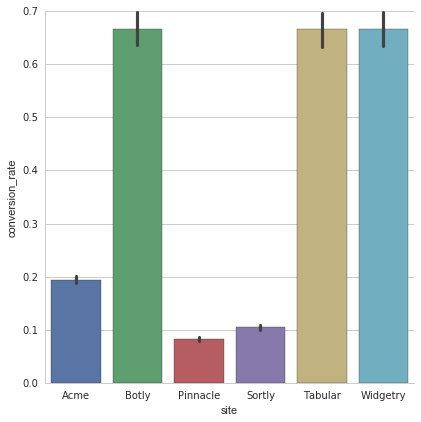

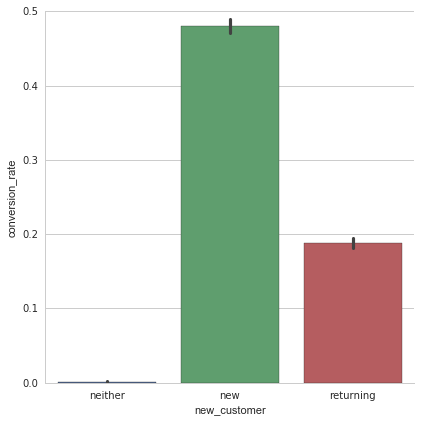

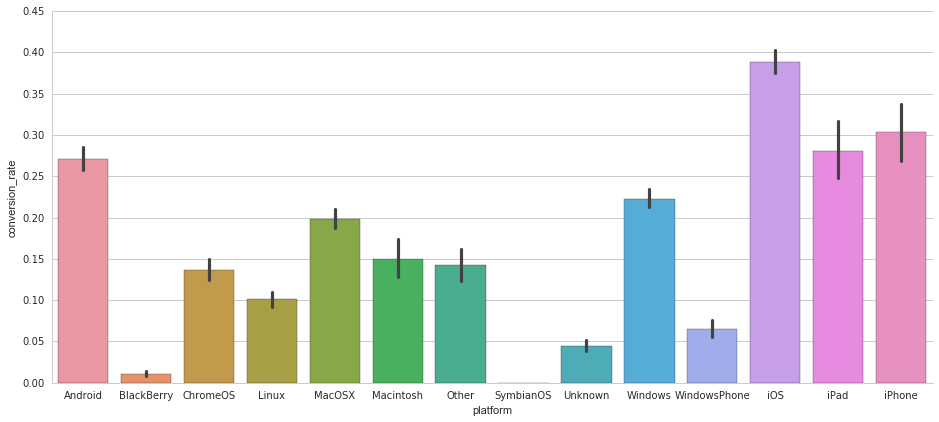

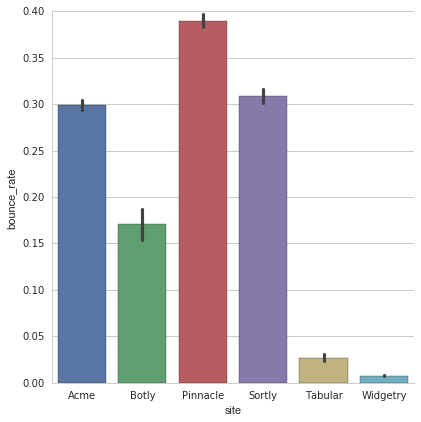

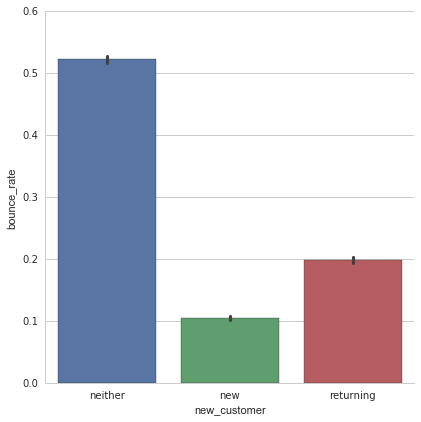

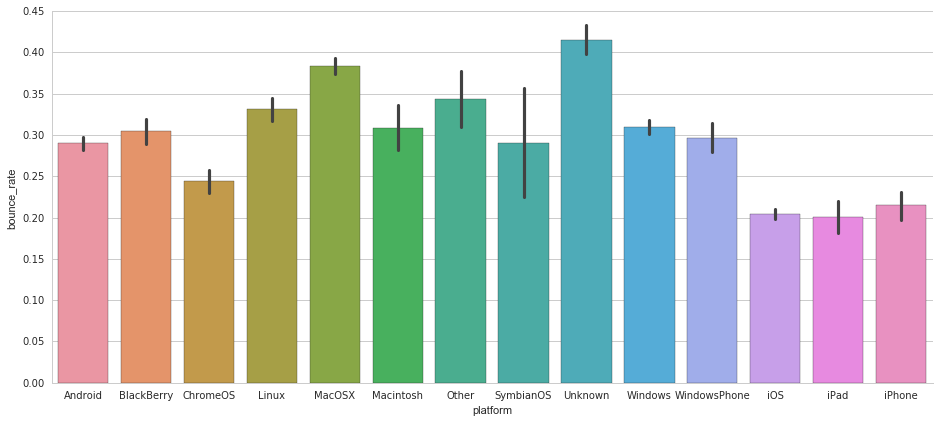

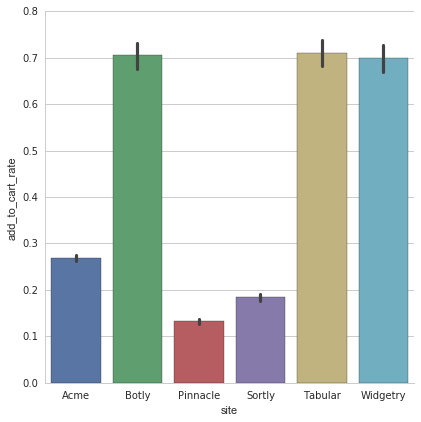

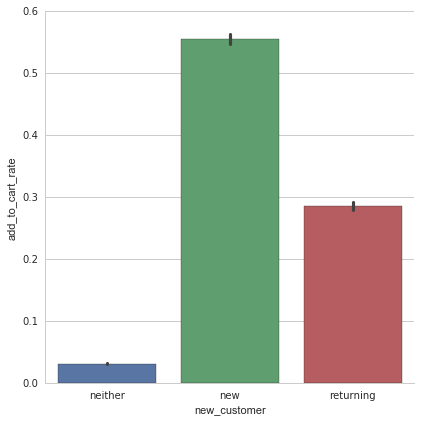

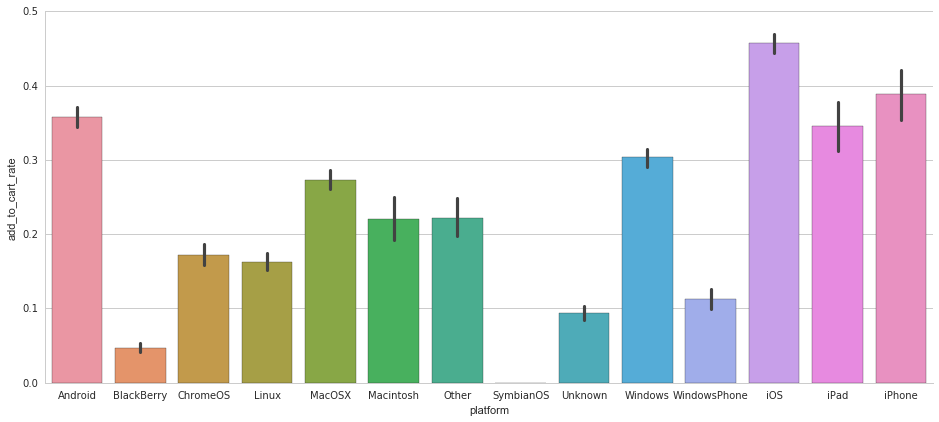

In [167]:
sns.set(style="whitegrid", color_codes=True)
g = sns.factorplot(x="site", y="conversion_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="new_customer", y="conversion_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="conversion_rate", data=data, aspect=2.2,size=6, kind="bar")
g = sns.factorplot(x="site", y="bounce_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="new_customer", y="bounce_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="bounce_rate", data=data, aspect=2.2,size=6, kind="bar")
g = sns.factorplot(x="site", y="add_to_cart_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="new_customer", y="add_to_cart_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="add_to_cart_rate", data=data, aspect=2.2,size=6, kind="bar")

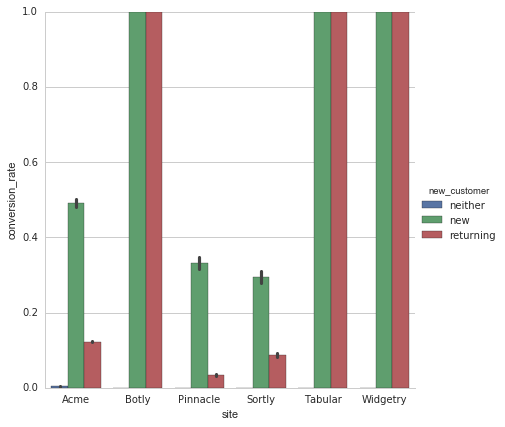

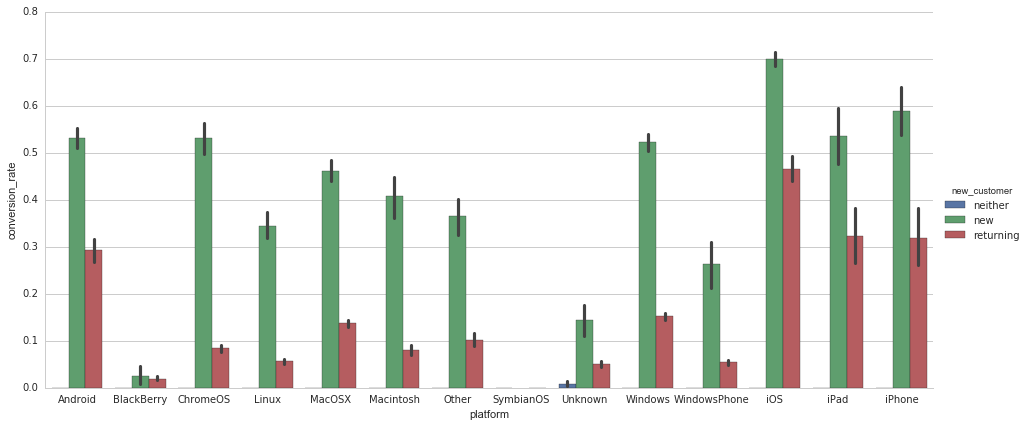

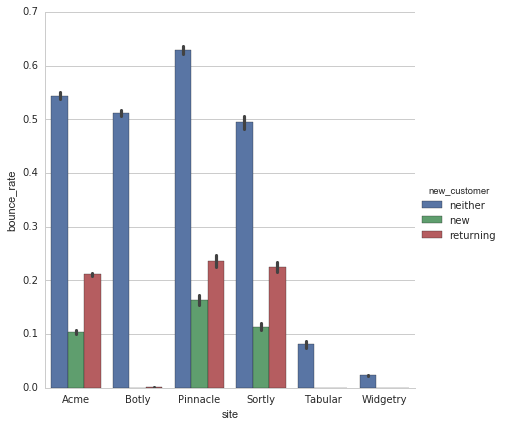

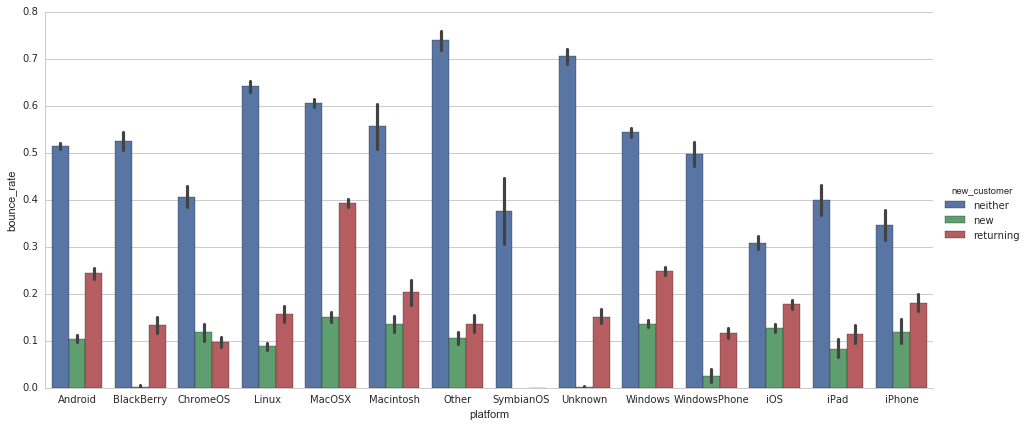

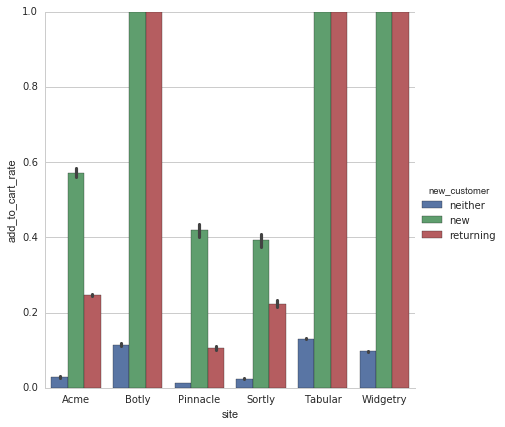

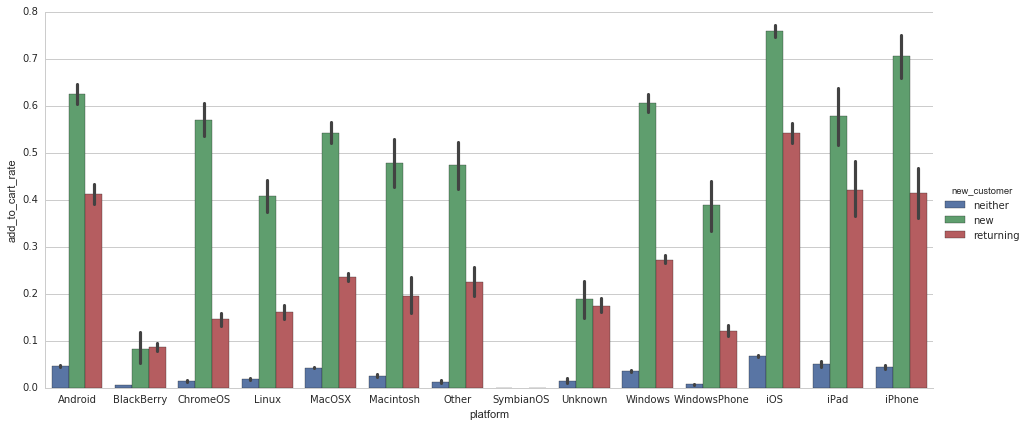

In [245]:
#data_reduce = data.drop(['conversion_rate', 'bounce_rate', 'add_to_cart_rate'], axis=1, inplace=False)
#g = sns.pairplot(data_reduce, hue='platform', diag_kind='kde')
#g = sns.pairplot(data_reduce, hue='site', diag_kind='kde')
#g = sns.pairplot(data_reduce, hue='new_customer', diag_kind='kde')
g = sns.factorplot(x="site", y="conversion_rate", hue="new_customer", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="conversion_rate", hue="new_customer", data=data, aspect=2.2,size=6, kind="bar")
g = sns.factorplot(x="site", y="bounce_rate", hue="new_customer", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="bounce_rate", hue="new_customer", data=data, aspect=2.2,size=6, kind="bar")
g = sns.factorplot(x="site", y="add_to_cart_rate", hue="new_customer", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="add_to_cart_rate", hue="new_customer", data=data, aspect=2.2,size=6, kind="bar")

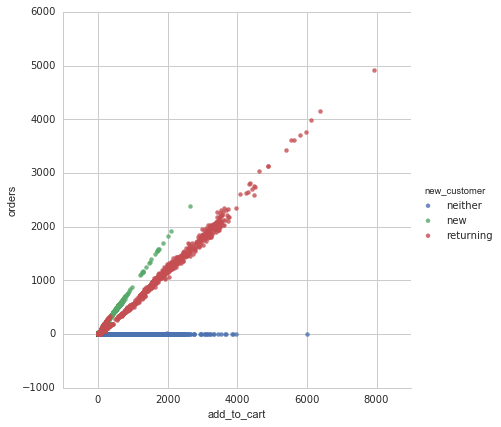

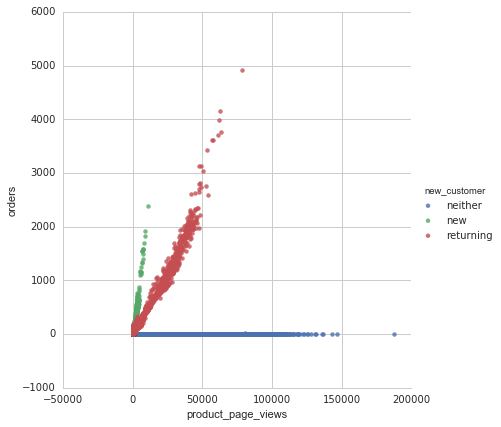

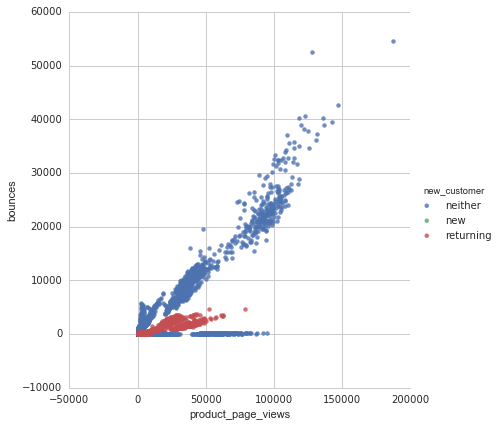

In [262]:
sns.lmplot(x="add_to_cart", y="orders", hue="new_customer", fit_reg=False, data=data, size=6,);
sns.lmplot(x="product_page_views", y="orders", hue="new_customer", fit_reg=False, data=data, size=6,);
sns.lmplot(x="product_page_views", y="bounces", hue="new_customer", fit_reg=False, data=data, size=6,);

# Supervised Learning

In [321]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn import preprocessing

In [398]:
data['spent'] = pd.Series((data['gross_sales'] != 0).astype(int), index=data.index)
data_reduce1 = data.drop(['gross_sales', 'conversion_rate', 'bounce_rate', 'add_to_cart_rate'],
                         axis=1, inplace=False)
feature_cols = list(data_reduce1.columns[:-1])
target_col = data_reduce1.columns[-1] 
X_all = data_reduce1[feature_cols]
y_all = data_reduce1[target_col]

In [399]:
a = pd.get_dummies(X_all['site'], prefix='site')
b = pd.get_dummies(X_all['new_customer'], prefix='new_customer')
c = pd.get_dummies(X_all['platform'], prefix='platform')
X_all = pd.concat([X_all, a, b, c], axis=1)
X_all.drop(['site','new_customer','platform'], axis=1, inplace=True)
X_all.dtypes

day                       datetime64[ns]
visits                             int64
distinct_sessions                  int64
orders                             int64
bounces                            int64
add_to_cart                        int64
product_page_views                 int64
search_page_views                  int64
site_Acme                        float64
site_Botly                       float64
site_Pinnacle                    float64
site_Sortly                      float64
site_Tabular                     float64
site_Widgetry                    float64
new_customer_neither             float64
new_customer_new                 float64
new_customer_returning           float64
platform_Android                 float64
platform_BlackBerry              float64
platform_ChromeOS                float64
platform_Linux                   float64
platform_MacOSX                  float64
platform_Macintosh               float64
platform_Other                   float64
platform_Symbian

## Working up to here

In [407]:
for i in [1,2,3,4,5,6,7]:
    
    X_all[[i]] = pd.Series(preprocessing.robust_scale(X_all[[i]]), index=X_all.index)

Exception: Data must be 1-dimensional

In [355]:
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (8 total features):
['day', 'visits', 'distinct_sessions', 'orders', 'bounces', 'add_to_cart', 'product_page_views', 'search_page_views']


In [276]:
train_index, test_index = next(iter(StratifiedShuffleSplit(y_all,test_size=0.25,random_state=seed)))
X_train, X_test = np.array(X_all)[train_index,:], np.array(X_all)[test_index,:]
y_train, y_test = y_all[train_index], y_all[test_index]

print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 15795 samples.
Testing set has 5266 samples.


In [280]:
def train_predict(clf, X_train, y_train, X_test, y_test):
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    clf.fit(X_train, y_train)
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    
def predict_labels(clf, features, target):
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred, pos_label='yes')

In [285]:
clf_A = RandomForestClassifier(random_state=seed)
clf_B = ExtraTreesClassifier(random_state=seed)
clf_C = BaggingClassifier(SVC(random_state=seed), random_state=seed)
clf_D = BaggingClassifier(KNeighborsClassifier(), random_state=seed)
clf_E = SGDClassifier(random_state=seed)

#train_predict(clf_A, X_train, y_train, X_test, y_test)
#train_predict(clf_B, X_train, y_train, X_test, y_test)
#train_predict(clf_C, X_train, y_train, X_test, y_test)
#train_predict(clf_D, X_train, y_train, X_test, y_test)
train_predict(clf_E, X_train, y_train, X_test, y_test)

Training a SGDClassifier using a training set size of 15795. . .


ValueError: could not convert string to float: MacOSX

# Unsupervised Learning

In [ ]:
from sklearn.decomposition import PCA
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

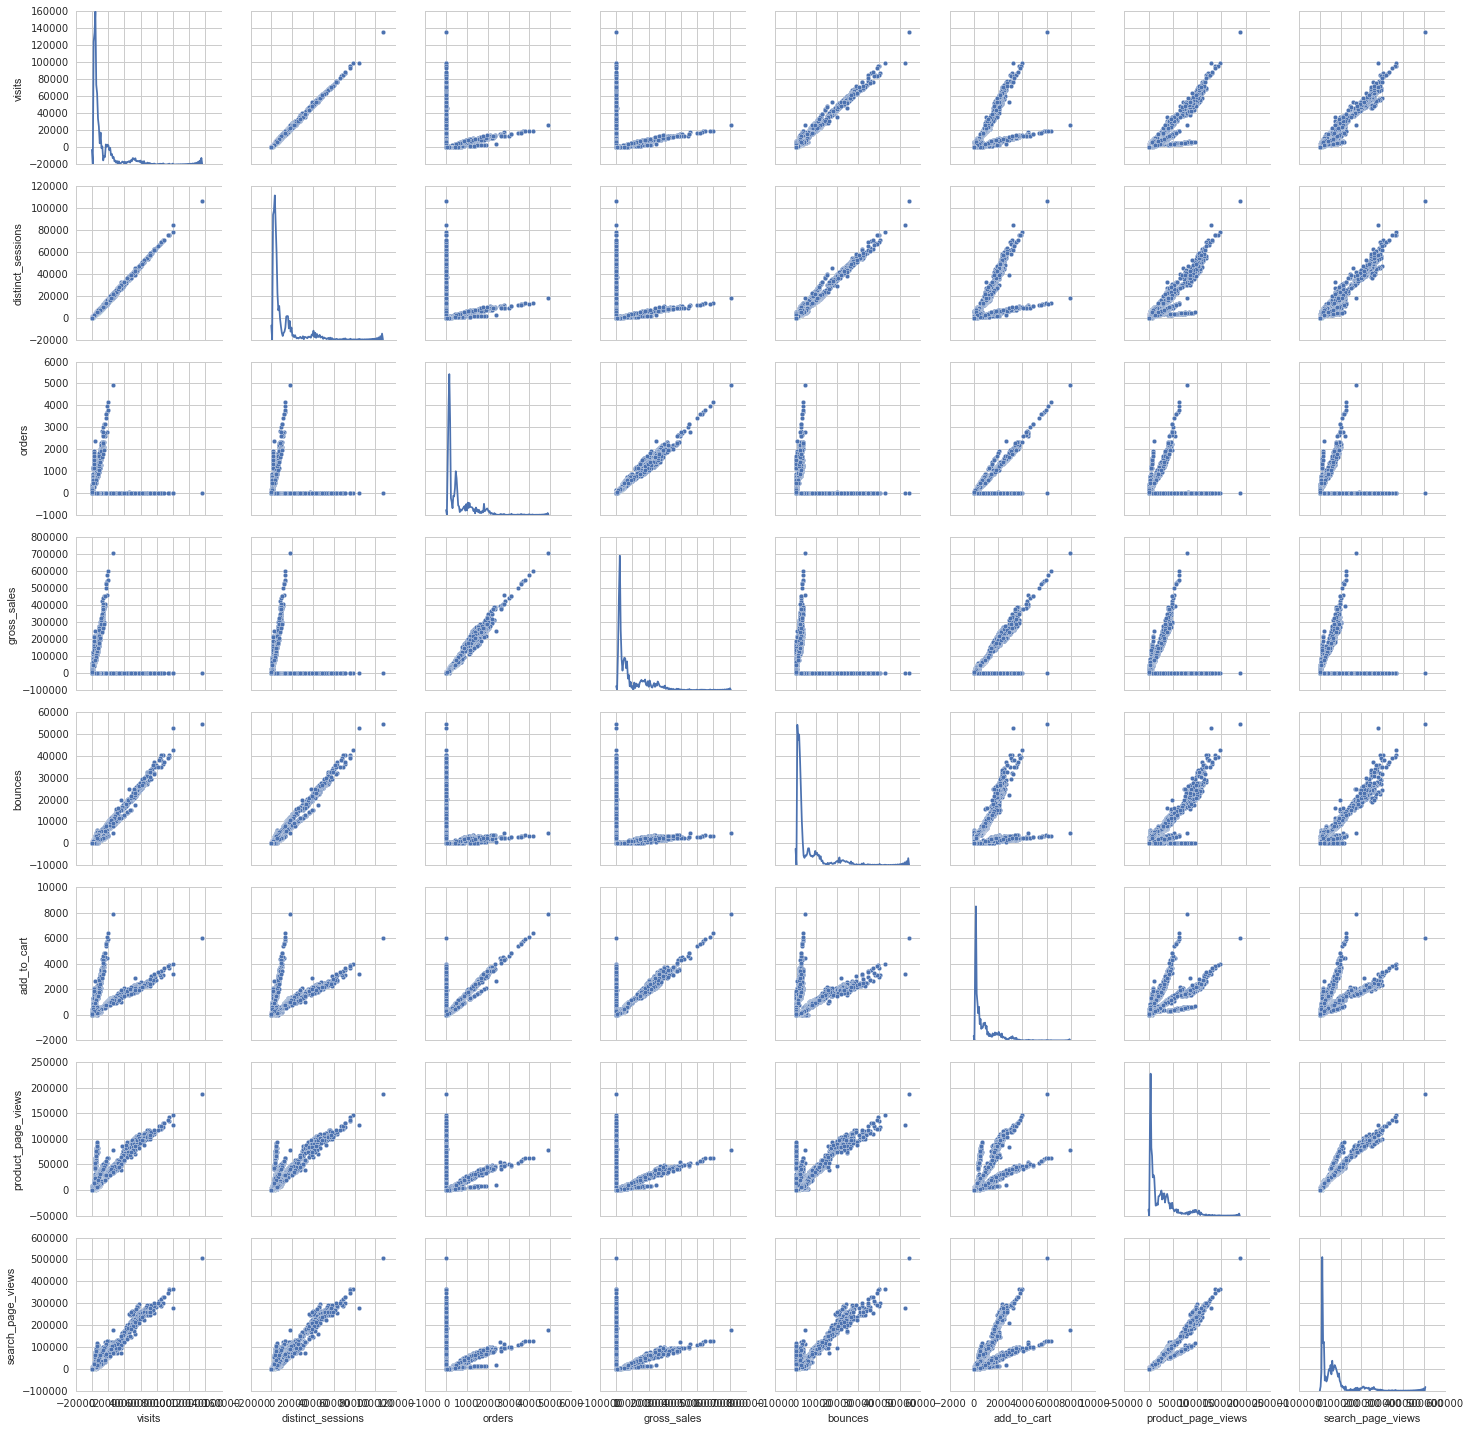

In [176]:
#mpl.rcParams.update(mpl.rcParamsDefault)
#%matplotlib inline

data_reduce = data.drop(['day', 'site', 'new_customer', 'platform',
                        'conversion_rate', 'bounce_rate', 'add_to_cart_rate'], axis=1, inplace=False)
g = sns.pairplot(data_reduce, diag_kind='kde')

In [181]:
indices = [1,11,98]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data_reduce.loc[indices], columns = data_reduce.keys()).reset_index(drop = True)
display(samples)

,visits,distinct_sessions,orders,gross_sales,bounces,add_to_cart,product_page_views,search_page_views
0,0,0,0,13.0,0,0,1,0
1,58192,46312,0,0.0,23664,2285,104651,258511
2,13071,8957,1941,280774.0,1921,3438,40757,83392


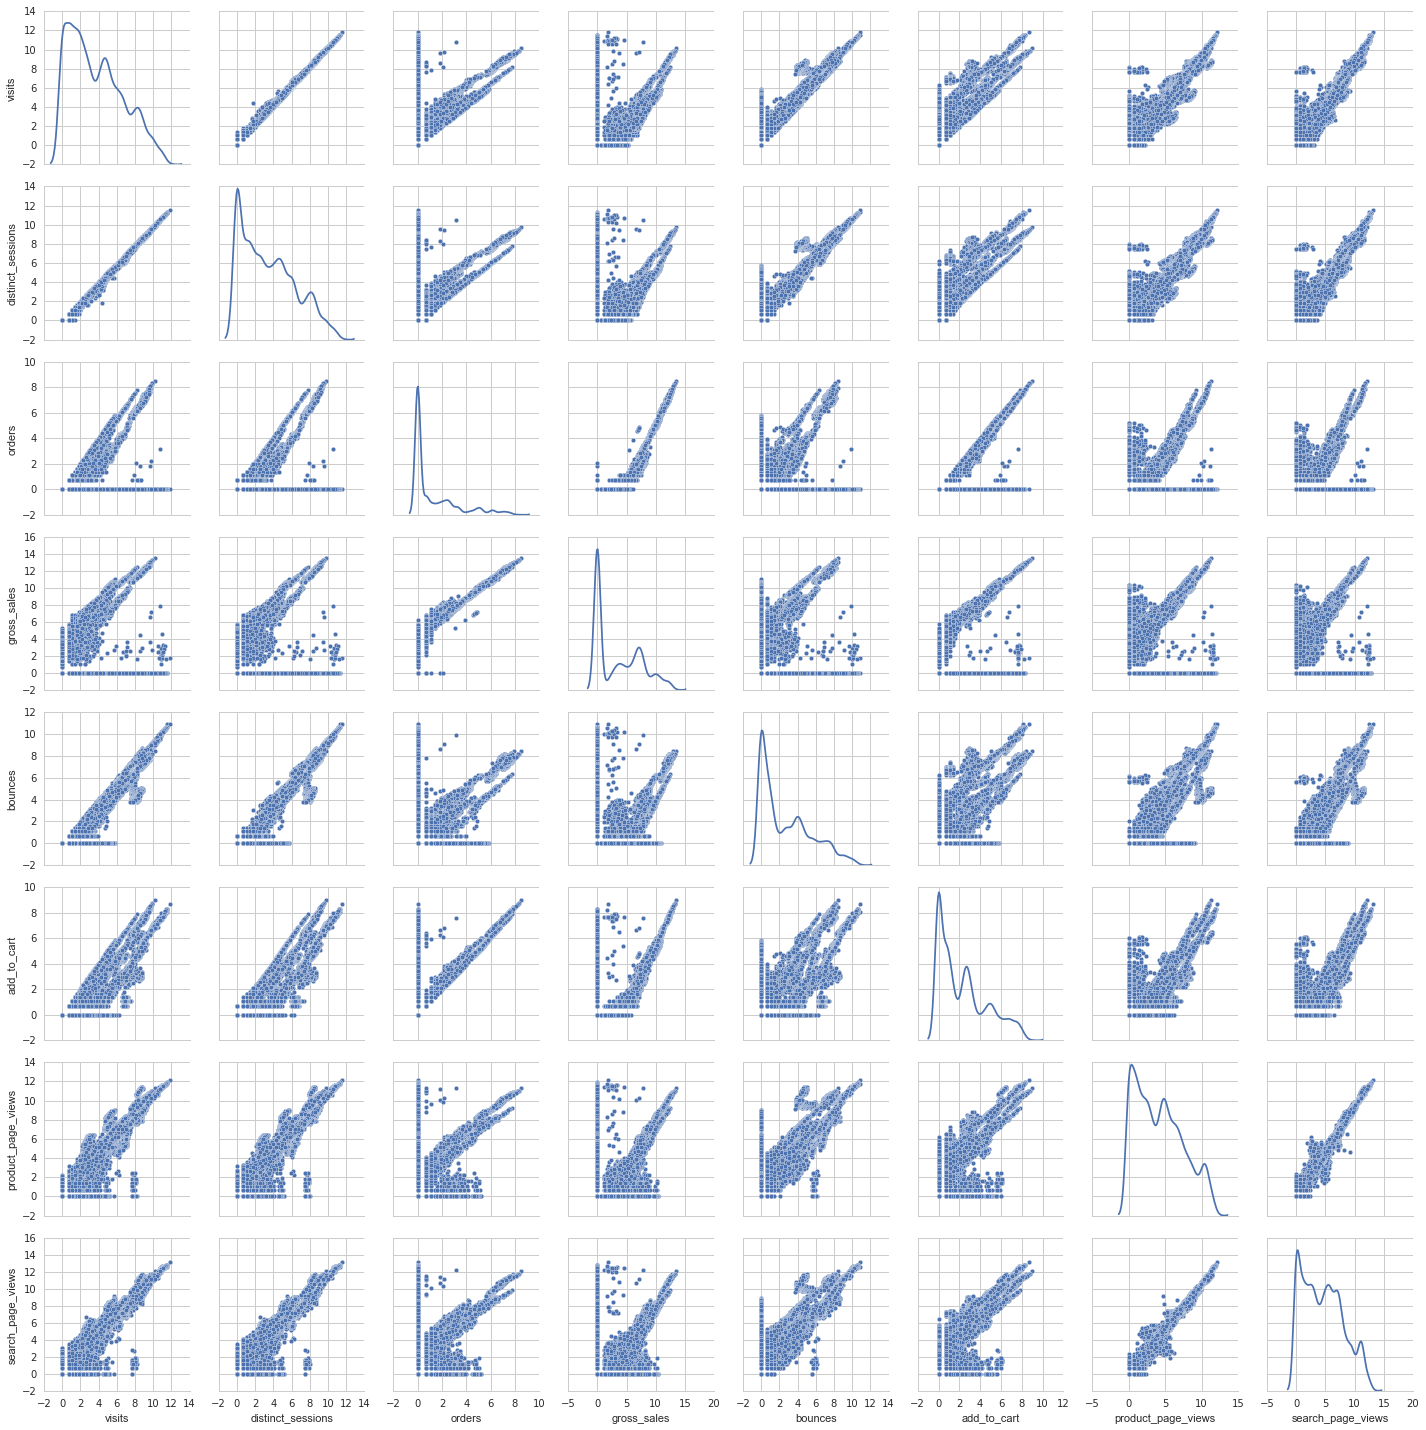

In [183]:
log_data = np.log(data_reduce + 1)
log_sample = np.log(samples + 1)

g = sns.pairplot(log_data, diag_kind='kde')

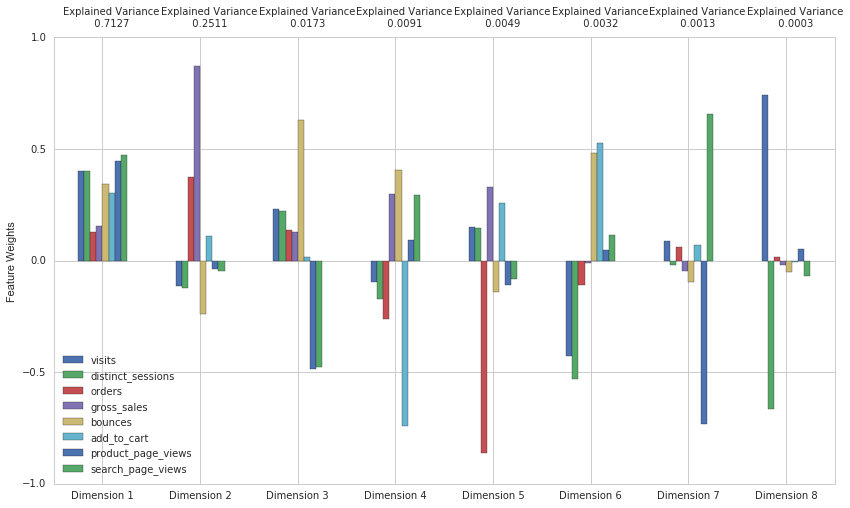

In [219]:
pca = PCA()
pca.fit(log_data)
pca_results = rs.pca_results(log_data, pca)
pca_samples = pca.transform(log_sample)

In [197]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8
0,-8.6740,0.3183,0.2164,-0.0561,0.2382,0.3746,-0.6094,-0.1701
1,16.2323,-7.1233,0.0292,-0.7407,0.8860,0.8924,0.0818,-0.0248
2,16.2061,7.7460,1.4101,-0.2829,-1.2781,0.2744,0.0527,-0.0023


In [238]:
pca = PCA(n_components=2)
pca.fit(log_data)

reduced_data = pca.transform(log_data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
pca_samples = pca.transform(log_sample)

In [200]:
for i in [6,5,4,3,2]:
    gmm = GMM(n_components=i,covariance_type='diag',random_state=seed,verbose=0)
    clusterer = gmm.fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.means_

    score = silhouette_score(reduced_data,preds,metric='euclidean',random_state=seed)
    print "For {:d} clusters, the mean silhouette coefficient is {:.3f}.".format(i,score)

For 6 clusters, the mean silhouette coefficient is 0.478.
For 5 clusters, the mean silhouette coefficient is 0.466.
For 4 clusters, the mean silhouette coefficient is 0.468.
For 3 clusters, the mean silhouette coefficient is 0.507.
For 2 clusters, the mean silhouette coefficient is 0.408.


In [203]:
for i in [6,5,4,3,2]:
    kmeans = KMeans(n_clusters=i,random_state=seed,verbose=0)
    clusterer = kmeans.fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.cluster_centers_ 

    score = silhouette_score(reduced_data,preds,metric='euclidean',random_state=seed)
    print "For {:d} clusters, the mean silhouette coefficient is {:.3f}.".format(i,score)

For 6 clusters, the mean silhouette coefficient is 0.511.
For 5 clusters, the mean silhouette coefficient is 0.524.
For 4 clusters, the mean silhouette coefficient is 0.495.
For 3 clusters, the mean silhouette coefficient is 0.543.
For 2 clusters, the mean silhouette coefficient is 0.481.


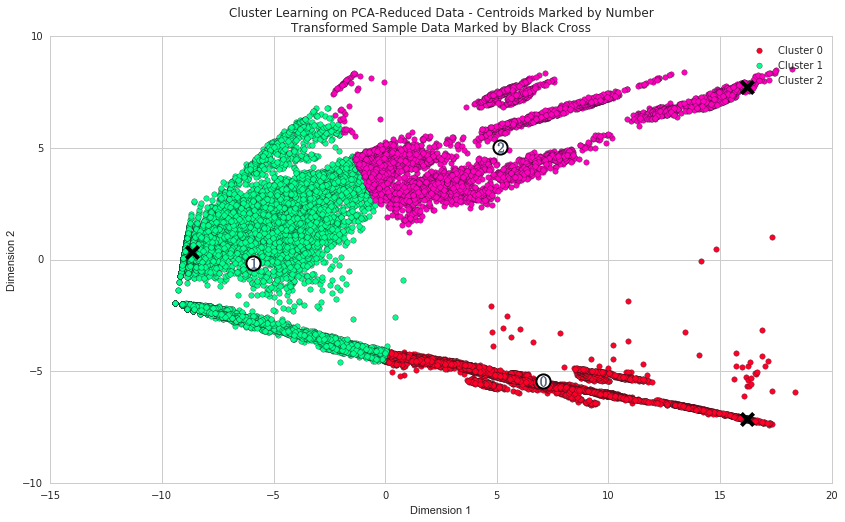

In [239]:
kmeans = KMeans(n_clusters=3,random_state=seed,verbose=0)
clusterer = kmeans.fit(reduced_data)
preds = clusterer.predict(reduced_data)
sample_preds = clusterer.predict(pca_samples)
centers = clusterer.cluster_centers_ 
rs.cluster_results(reduced_data, preds, centers, pca_samples)

,visits,distinct_sessions,orders,gross_sales,bounces,add_to_cart,product_page_views,search_page_views
Segment 0,1419.0,1134.0,0.0,-0.0,653.0,48.0,2004.0,3625.0
Segment 1,3.0,2.0,1.0,12.0,1.0,1.0,4.0,5.0
Segment 2,193.0,140.0,43.0,6630.0,26.0,84.0,579.0,893.0


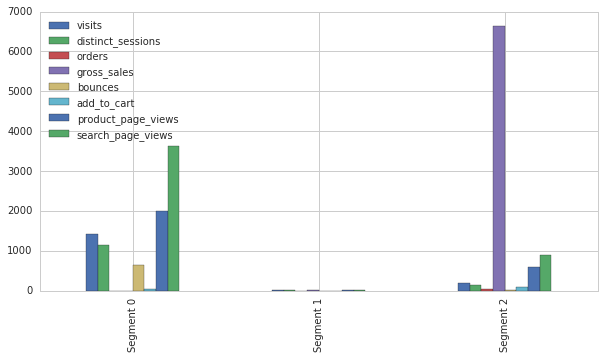

In [207]:
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers) - 1

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data_reduce.keys())
true_centers.index = segments
display(true_centers)
true_centers.plot(kind = 'bar', figsize = (10, 5))

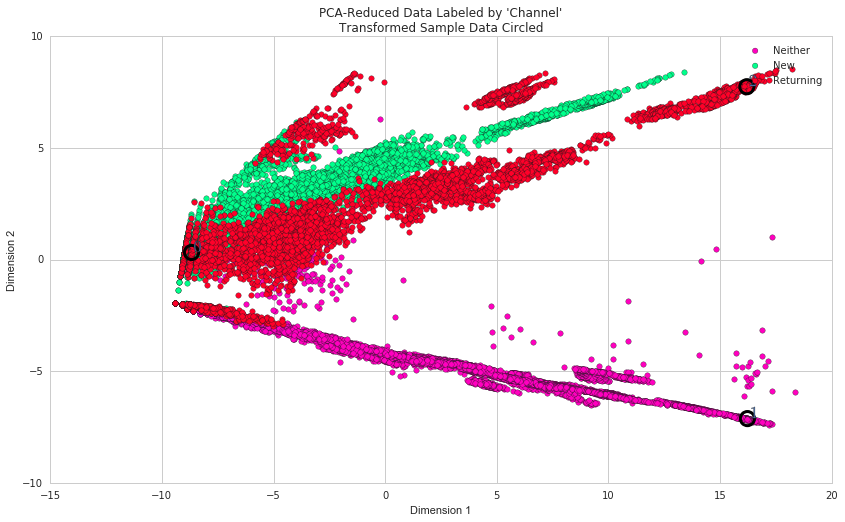

In [235]:
reload(rs) 
rs.channel_results(reduced_data, data, pca_samples)